**Question answering using Semantic(meaning) Search Workflow**

* 1. Install required dependecies
    - setence transformers - for generating semantic embeddings of sentences or texts using pre-trained models
    - PyPDF2 - For extracting text from PDF files

In [ ]:
!pip install sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 87.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.3 MB/s eta 0:00:00


**2. Extract text data from a PDF file using PyPDF2**

In [ ]:
import PyPDF2

def extract_data_from_pdf(pdf_path):
    with open(pdf_path , 'rb') as file:
        pdfreader = PyPDF2.PdfReader(file)
        full_text = ''
        for page in pdfreader.pages:
            full_text += page.extract_text()
    return full_text

extracted_text = extract_data_from_pdf('/content/company_manual.pdf')
print(extracted_text)

Company Manual - TechNova Solutions Pvt. Ltd.
About the Company
TechNova Solutions Pvt. Ltd. is a global leader in consumer electronics, committed to delivering
innovative technology and excellent customer service. 
Founded in 2005, TechNova has grown to serve over 20 million customers across 35 countries. We
specialize in smart devices, home automation, and sustainable technology solutions.
Our mission is to make everyday life smarter, simpler, and more connected. We believe in constant
innovation, environmental responsibility, and customer satisfaction above all else.
Our headquarters are located in Bengaluru, India, with major regional offices in Singapore,
Germany, and the United States.
Return Policy
We offer a 30-day return policy on all our products purchased directly through our website or
authorized outlets.
To be eligible for a return, the product must be unused, in its original packaging, and accompanied
by the original invoice. Refunds are initiated after we receive and ins

**3. Clean and preprocessing the extracted text**

In [ ]:
import re

def clean_text(text):
    # remove extra spaces
    text = re.sub(r'\s+' , ' ' , text)
    # remove non-ascii characters (if any)
    text = re.sub(r'[^\x00-\x7F]+', '', text)
    return text

cleaned_text = clean_text(extracted_text)
print(cleaned_text)

Company Manual - TechNova Solutions Pvt. Ltd. About the Company TechNova Solutions Pvt. Ltd. is a global leader in consumer electronics, committed to delivering innovative technology and excellent customer service. Founded in 2005, TechNova has grown to serve over 20 million customers across 35 countries. We specialize in smart devices, home automation, and sustainable technology solutions. Our mission is to make everyday life smarter, simpler, and more connected. We believe in constant innovation, environmental responsibility, and customer satisfaction above all else. Our headquarters are located in Bengaluru, India, with major regional offices in Singapore, Germany, and the United States. Return Policy We offer a 30-day return policy on all our products purchased directly through our website or authorized outlets. To be eligible for a return, the product must be unused, in its original packaging, and accompanied by the original invoice. Refunds are initiated after we receive and insp

**4. Load and use pre-trained Sentence Transformer model**
   - sentence-transformers library provides pre-trained models for generating semantic embeddings.
   - https://huggingface.co/sentence-transformers
   - Load a lightweight and powerful model capabale of producing 384-dimensional embeddings for sentences or paragraph.

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer("all-MiniLM-L6-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

**5. Segmenting the document content into logical sections**

In [ ]:
sections = {
    "About the Company": cleaned_text.split('About the Company')[1].split('Return Policy')[0],
    "Return Policy": cleaned_text.split('Return Policy')[1].split('Warranty')[0],
    "Warranty": cleaned_text.split('Warranty')[1].split('Customer Service')[0],
    "Customer Service": cleaned_text.split('Customer Service')[1].split('Environmental Commitment')[0],
    "Environmental Commitment": cleaned_text.split('Environmental Commitment')[1]
}

**6. Create Embeddings for each section and for a given query**
   - we encode both document sections and user's query into vector representations (embeddings).

In [ ]:
#Encode a query-
query = "How do I send the product back?"
#query = "My friend want to explore the company"
query_embedding = model.encode([query])[0]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [ ]:
#Encoding of each section
section_embeddings = {}

for title,content in sections.items():
  #print(title ,"-", content)
  section_embeddings[title] = model.encode([content])[0]

In [ ]:
print(section_embeddings)

{'About the Company': array([-1.94066036e-02, -3.54423411e-02,  3.85860391e-02, -5.36834821e-02,
        2.51647569e-02, -3.02339047e-02,  3.12746465e-02,  2.59435754e-02,
       -2.90768631e-02, -1.34493492e-03,  1.17628844e-02, -2.29398552e-02,
        1.20144606e-01,  4.24275659e-02,  2.60859840e-02, -2.58982256e-02,
       -2.39651781e-02, -1.38112456e-01,  1.36429310e-01, -7.11748889e-03,
       -1.20775560e-02,  1.43479174e-02,  1.74152646e-02, -6.49427846e-02,
       -3.93552035e-02,  8.69337246e-02,  3.97436842e-02, -4.37683165e-02,
       -3.62016223e-02, -4.89610136e-02, -7.07161427e-02,  9.10660699e-02,
       -3.39437388e-02, -1.93184067e-03, -4.98676598e-02,  5.38354591e-02,
       -7.11749271e-02,  2.96122395e-02, -3.46268207e-04, -2.34513357e-03,
        2.43792450e-03, -8.45075101e-02, -5.71883507e-02, -5.55860549e-02,
        8.30605626e-02, -4.24157083e-02,  5.50113386e-03, -9.30460691e-02,
        4.24583107e-02, -2.55111754e-02,  8.91532563e-03, -5.96445911e-02,
   

**7. Calculate the cosine similarity to identify the most relevant sections**
   - Cosine similarity score quantifies how similar two vectors are.
   - The section with the highest similarity to the query is the best match.

In [ ]:
import numpy as np

def cosine_similarity(a,b):
  return np.dot(a,b)/(np.linalg.norm(a) * np.linalg.norm(b))

In [ ]:
#Calculate cosine similarity between query_embedding vector and vector of each section in your document

similarities = {}

for title,emb in section_embeddings.items():
  similarity_score = cosine_similarity(query_embedding , emb)
  similarities[title] = similarity_score

In [ ]:
print(similarities)

{'About the Company': np.float32(0.106717214), 'Return Policy': np.float32(0.47407472), 'Warranty': np.float32(0.1171249), 'Customer Service': np.float32(0.23411852), 'Environmental Commitment': np.float32(0.1689062)}


**8.Visualising the similarity score**

['About the Company', 'Return Policy', 'Warranty', 'Customer Service', 'Environmental Commitment']
[np.float32(0.106717214), np.float32(0.47407472), np.float32(0.1171249), np.float32(0.23411852), np.float32(0.1689062)]


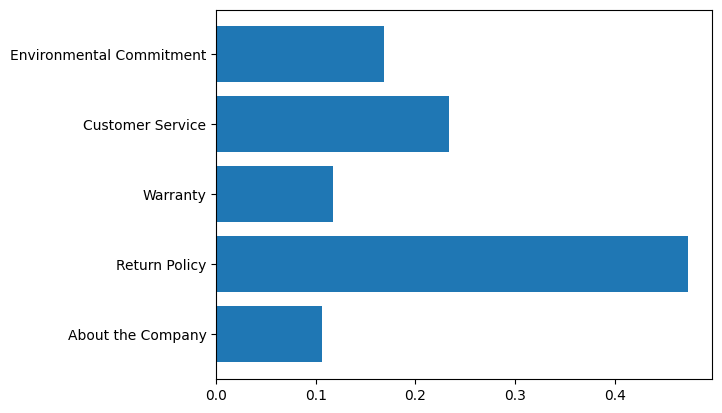

In [ ]:
import matplotlib.pyplot as plt            #python library for data plotting or visualisation

titles = list(similarities.keys())
scores = list(similarities.values())

print(titles)
print(scores)

plt.barh(titles , scores)               #horizontal bar plot
plt.show()

**Implementing a semantic search chatbot function**
   - A chatbot function that can take user query and returns the most relevant section based on sementic similarity.

In [ ]:
print(sections['About the Company'])

 TechNova Solutions Pvt. Ltd. is a global leader in consumer electronics, committed to delivering innovative technology and excellent customer service. Founded in 2005, TechNova has grown to serve over 20 million customers across 35 countries. We specialize in smart devices, home automation, and sustainable technology solutions. Our mission is to make everyday life smarter, simpler, and more connected. We believe in constant innovation, environmental responsibility, and customer satisfaction above all else. Our headquarters are located in Bengaluru, India, with major regional offices in Singapore, Germany, and the United States. 


In [ ]:
def semantic_search(query , sections , model):
  query_embedding = model.encode([query])[0]
  default_similarity = 0.0
  best_match = None

  for title,content in sections.items():
    section_embedding = model.encode([content])[0]
    similarity_score = cosine_similarity(query_embedding , section_embedding)
    if similarity_score > default_similarity:
      default_similarity = similarity_score
      best_match = title
  if best_match:
    return f"Bot: The most relevant section is {best_match}\nHere is the information:\n{sections[best_match]}"
  else:
    return "Bot: I couldn't find the relevant answer."

In [ ]:
sections = {
    "About the Company": cleaned_text.split('About the Company')[1].split('Return Policy')[0],
    "Return Policy": cleaned_text.split('Return Policy')[1].split('Warranty')[0],
    "Warranty": cleaned_text.split('Warranty')[1].split('Customer Service')[0],
    "Customer Service": cleaned_text.split('Customer Service')[1].split('Environmental Commitment')[0],
    "Environmental Commitment": cleaned_text.split('Environmental Commitment')[1]
}

In [ ]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [ ]:
response = semantic_search("send the product back" , sections , model)
print(response)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `BertSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


Bot: The most relevant section is Return Policy
Here is the information:
 We offer a 30-day return policy on all our products purchased directly through our website or authorized outlets. To be eligible for a return, the product must be unused, in its original packaging, and accompanied by the original invoice. Refunds are initiated after we receive and inspect the returned item. Returns are not accepted for customized products, opened software, or items marked 'final sale.' For international orders, return shipping costs are borne by the customer unless the product is found defective upon arrival. Please initiate your return through our online portal or by contacting our support team within 30 days of delivery. 
